In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
base_path = "./data"

def read(path: str) -> pd.DataFrame:
    return pd.read_csv(f"{path}.csv")

In [3]:
sized_datasets_available = [3, 5, 8, 10, 15, 25, 35, 50, 75, 100, 120]

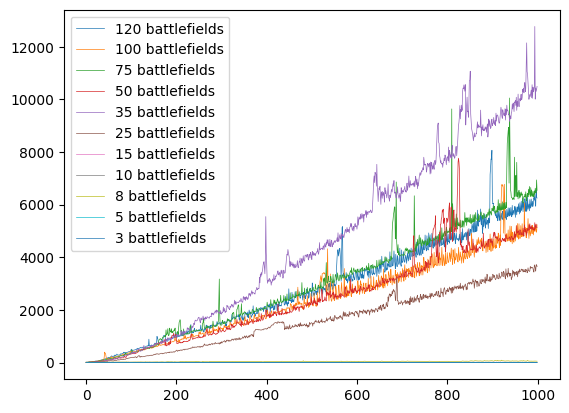

In [4]:
for i in reversed(sized_datasets_available):
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    plt.plot(df['duration'], linewidth=0.5, label=f"{i} battlefields")

plt.legend(loc=2)
plt.savefig(f"{base_path}/results/time_per_step.png")


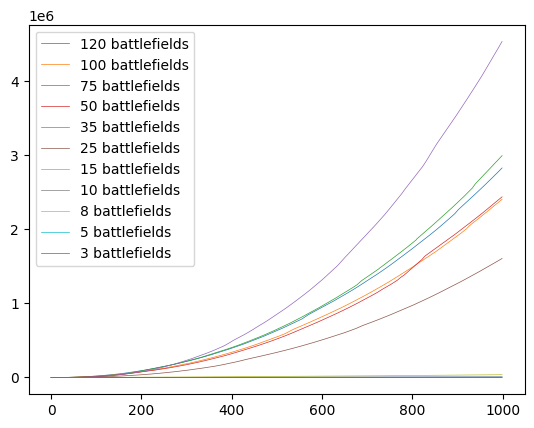

In [5]:
for i in reversed(sized_datasets_available):
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    df['total_time'] = np.cumsum(df['duration'])
    plt.plot(df['total_time'], linewidth=0.5, label=f"{i} battlefields")

plt.legend(loc=2)
plt.savefig(f"{base_path}/results/total_time_after_step.png")

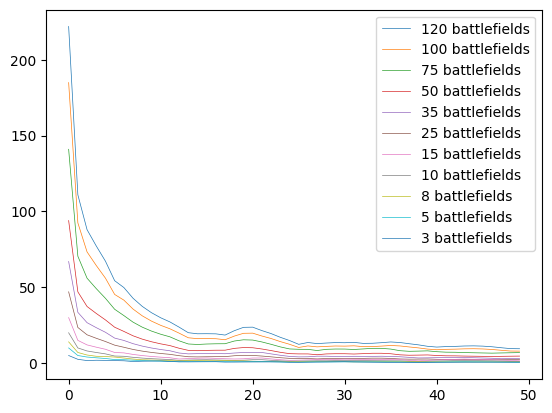

In [9]:
for i in reversed(sized_datasets_available):
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    plt.plot(df['epsilon'][0:50], linewidth=0.5, label=f"{i} battlefields")

plt.legend(loc=1)
plt.savefig(f"{base_path}/results/early_epsilon_after_step.png")

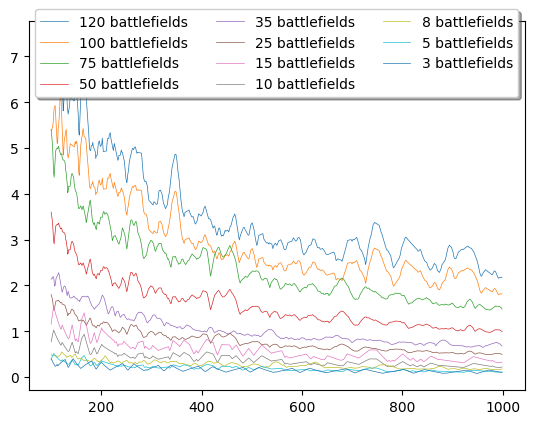

In [10]:
for i in reversed(sized_datasets_available):
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    plt.plot(df['epsilon'][100:], linewidth=0.5, label=f"{i} battlefields")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.savefig(f"{base_path}/results/late_epsilon_after_step.png")